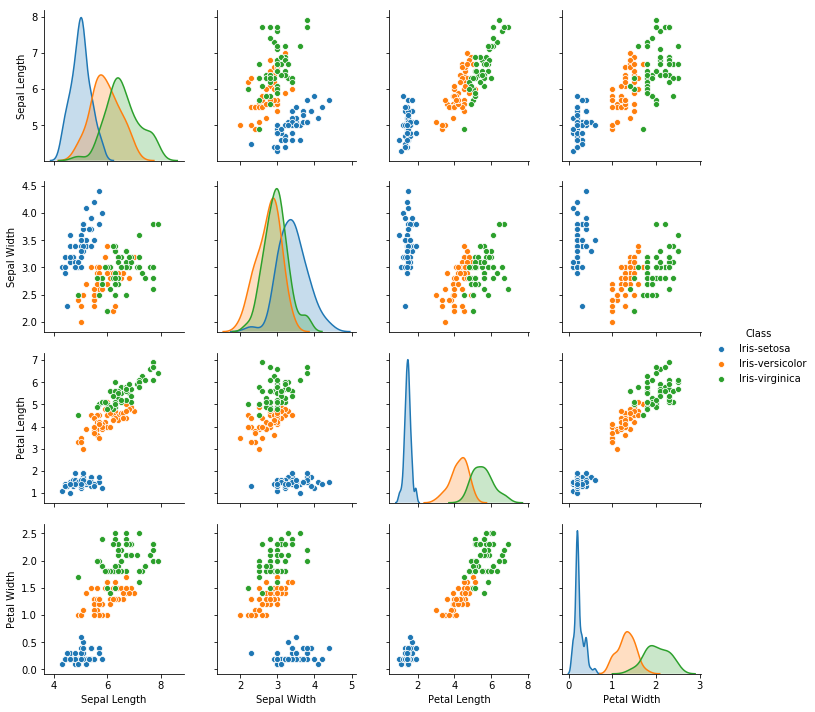

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

df = pd.read_csv("./iris.csv")
sns.pairplot(df, hue = "Class")

In [4]:
input_data = df[['Sepal Length','Sepal Width','Petal Length','Petal Width']].values
label = df['Class'].values
(train_data, test_data, train_output, test_output) = train_test_split(input_data, label, train_size = 0.75, random_state = 1)

decisionTree = DecisionTreeClassifier(criterion = 'entropy')
decisionTree.fit(train_data, train_output)
print("The accuracy of the decision tree model is: %05f"%decisionTree.score(test_data, test_output))



The accuracy of the decision tree model is: 0.973684


/home/tan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
import graphviz 

dot_data = tree.export_graphviz(decisionTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names=iris.feature_names,  
                    class_names=iris.target_names,  
                    filled=True, rounded=True,)
graph = graphviz.Source(dot_data)
graph

ModuleNotFoundError: No module named 'graphviz'

In [7]:
!conda install graphviz

Solving environment: done

# All requested packages already installed.

